In [22]:
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=3267f49f7b90abaddfb44a8d820f80f7fac37f56404cb54781fc18248a87ecfe
  Stored in directory: /home/sultand/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
print(os.getcwd())
import time

#import empirical cdf
import sys
sys.path.append(os.path.abspath('streamlined_mop/src'))
# sys.path.append(os.path.abspath('..'))

from check_ecdf import get_empirical_cdf
import filterpy
import math

/home/sultand/mop_modifications


## experiment details

In [2]:
ckpt_step = 192000
num_val_systems = 1000
context_len = 250

### Gaussian settings

In [3]:
trainA = "gaussA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
valA = "gaussA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
print('context_len:', context_len)
print('trainA:', trainA)
print('valA:', valA)
print("num_val_systems:", num_val_systems)
C_dist = "_gauss_C" #"_unif_C" #"_gauss_C" #"_gauss_C_large_var" #"_single_system"
experiment = "241017_004753.f5e328_gaussA_gauss_C"
print("experiment string:", experiment)

# #print the absolute path of the experiment
# print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl"))

# #load prediction errors

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl", 'rb') as f:
#     gauss_err_lss = pickle.load(f)


# #load val sim_objs

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
#     gauss_sim_objs = pickle.load(f)


#print the absolute path of the experiment
print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl"))

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl", 'rb') as f:
    gauss_val = pickle.load(f)

#load val sim_objs

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
    gauss_sim_objs = pickle.load(f)

context_len: 250
trainA: gaussA
valA: gaussA
num_val_systems: 1000
experiment string: 241017_004753.f5e328_gaussA_gauss_C
/home/sultand/mop_modifications/streamlined_mop/outputs/GPT2/241017_004753.f5e328_gaussA_gauss_C/data/val_gaussA_gauss_C.pkl


### Rotated Diagonal Settings

In [4]:
trainA = "gaussA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
valA = "rotDiagA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
print('context_len:', context_len)
print('trainA:', trainA)
print('valA:', valA)
print("num_val_systems:", num_val_systems)
C_dist = "_gauss_C" #"_unif_C" #"_gauss_C" #"_gauss_C_large_var" #"_single_system"
experiment = "241017_004753.f5e328_gaussA_gauss_C"
print("experiment string:", experiment)

# #print the absolute path of the experiment
# print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl"))

# #load prediction errors

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl", 'rb') as f:
#     rotdiag_err_lss = pickle.load(f)

# #load val sim_objs

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
#     rotdiag_sim_objs = pickle.load(f)


#print the absolute path of the experiment
print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl"))

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl", 'rb') as f:
    rotdiag_val = pickle.load(f)

#load val sim_objs

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
    rotdiag_sim_objs = pickle.load(f)

context_len: 250
trainA: gaussA
valA: rotDiagA
num_val_systems: 1000
experiment string: 241017_004753.f5e328_gaussA_gauss_C
/home/sultand/mop_modifications/streamlined_mop/outputs/GPT2/241017_004753.f5e328_gaussA_gauss_C/data/val_rotDiagA_gauss_C.pkl


### Upper Triangular Settings

In [5]:
trainA = "gaussA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
valA = "upperTriA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
print('context_len:', context_len)
print('trainA:', trainA)
print('valA:', valA)
print("num_val_systems:", num_val_systems)
C_dist = "_gauss_C" #"_unif_C" #"_gauss_C" #"_gauss_C_large_var" #"_single_system"
experiment = "241017_004753.f5e328_gaussA_gauss_C"
print("experiment string:", experiment)

# #print the absolute path of the experiment
# print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl"))

# #load prediction errors

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl", 'rb') as f:
#     upptri_err_lss = pickle.load(f)

# #load val sim_objs

# with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
#     upptri_sim_objs = pickle.load(f)


#print the absolute path of the experiment
print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl"))

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl", 'rb') as f:
    upptri_val = pickle.load(f)

#load val sim_objs

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
    upptri_sim_objs = pickle.load(f)


context_len: 250
trainA: gaussA
valA: upperTriA
num_val_systems: 1000
experiment string: 241017_004753.f5e328_gaussA_gauss_C
/home/sultand/mop_modifications/streamlined_mop/outputs/GPT2/241017_004753.f5e328_gaussA_gauss_C/data/val_upperTriA_gauss_C.pkl


### New Upper Triangular Settings

In [59]:
trainA = "unifA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
valA = "upperTriA" #"unifA" #"gaussA" #"gaussA_noscale" #"rotDiagA" #"rotDiagA_unif" #"rotDiagA_gauss" #"upperTriA" #"single_system" #"cond_num"
print('context_len:', context_len)
print('trainA:', trainA)
print('valA:', valA)
print("num_val_systems:", num_val_systems)
C_dist = "_gauss_C" #"_unif_C" #"_gauss_C" #"_gauss_C_large_var" #"_single_system"
experiment = "241011_194532.92d997_unifA_gauss_C"
print("experiment string:", experiment)

#print the absolute path of the experiment
print(os.path.abspath(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/prediction_errors{C_dist}_step={str(ckpt_step)}.ckpt/{valA}_err_lss.pkl"))

#new val ys

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}.pkl", 'rb') as f:
    new_upptri_val = pickle.load(f)

#load val sim_objs

with open(f"../mop_modifications/streamlined_mop/outputs/GPT2/{experiment}/data/val_{valA}{C_dist}_sim_objs.pkl", 'rb') as f:
    new_upptri_sim_objs = pickle.load(f)

context_len: 250
trainA: unifA
valA: upperTriA
num_val_systems: 1000
experiment string: 241011_194532.92d997_unifA_gauss_C
/home/sultand/mop_modifications/streamlined_mop/outputs/GPT2/241011_194532.92d997_unifA_gauss_C/prediction_errors_gauss_C_step=192000.ckpt/upperTriA_err_lss.pkl


In [16]:
print(gauss_sim_objs[0].S_state_inf)

[[ 0.03166999  0.00246618 -0.00306903  0.00965422  0.00958603 -0.00201942
   0.0020044   0.01338994 -0.00977871  0.00591258]
 [ 0.00246618  0.04740969  0.01667328 -0.01753904 -0.01439527 -0.01484161
   0.01339091 -0.0072126   0.00809115  0.00364424]
 [-0.00306903  0.01667328  0.03621195 -0.01876771 -0.02125883 -0.03182926
   0.01484459  0.00311769  0.01436302  0.00135594]
 [ 0.00965422 -0.01753904 -0.01876771  0.04032526  0.02421254  0.01783181
  -0.0050034   0.0014516  -0.02326917 -0.00111646]
 [ 0.00958603 -0.01439527 -0.02125883  0.02421254  0.04044607  0.02953296
  -0.00394875  0.00213225 -0.02429862  0.00137132]
 [-0.00201942 -0.01484161 -0.03182926  0.01783181  0.02953296  0.06578215
  -0.01776047 -0.01328156 -0.02453549 -0.00148435]
 [ 0.0020044   0.01339091  0.01484459 -0.0050034  -0.00394875 -0.01776047
   0.03805746 -0.00297087  0.0008515   0.00272027]
 [ 0.01338994 -0.0072126   0.00311769  0.0014516   0.00213225 -0.01328156
  -0.00297087  0.03308213  0.00226098  0.00221094]


shape of zeros: (1000, 2000, 251)
shape of zeros: (1000,)
Gaussian Average Y value:  0.999883472827301
Gaussian Median Y value:  0.9997042471074855
shape of zeros: (1000, 2000, 251)
shape of zeros: (1000,)
Rotated Diagonal Average Y value:  1.0000919972963074
Rotated Diagonal Median Y value:  1.0000817531031294
shape of zeros: (1000, 2000, 251)
shape of zeros: (1000,)
Upper Triangular Average Y value:  0.9997132359966379
Upper Triangular Median Y value:  0.9998025131250383


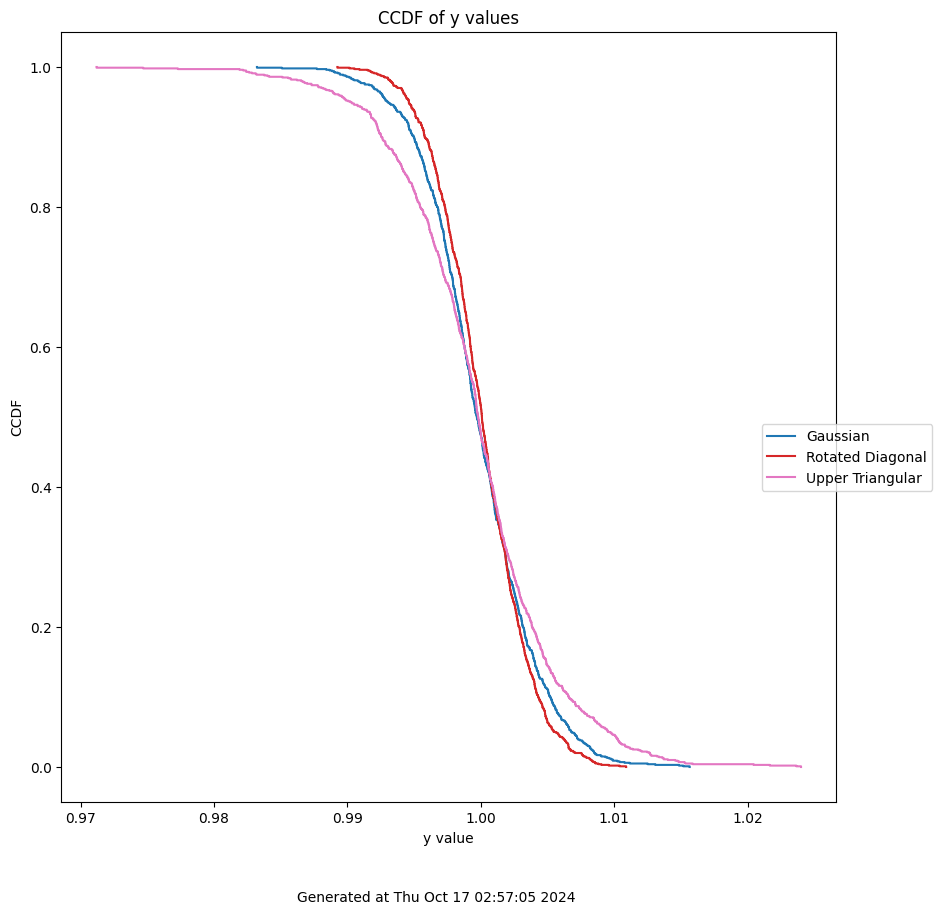

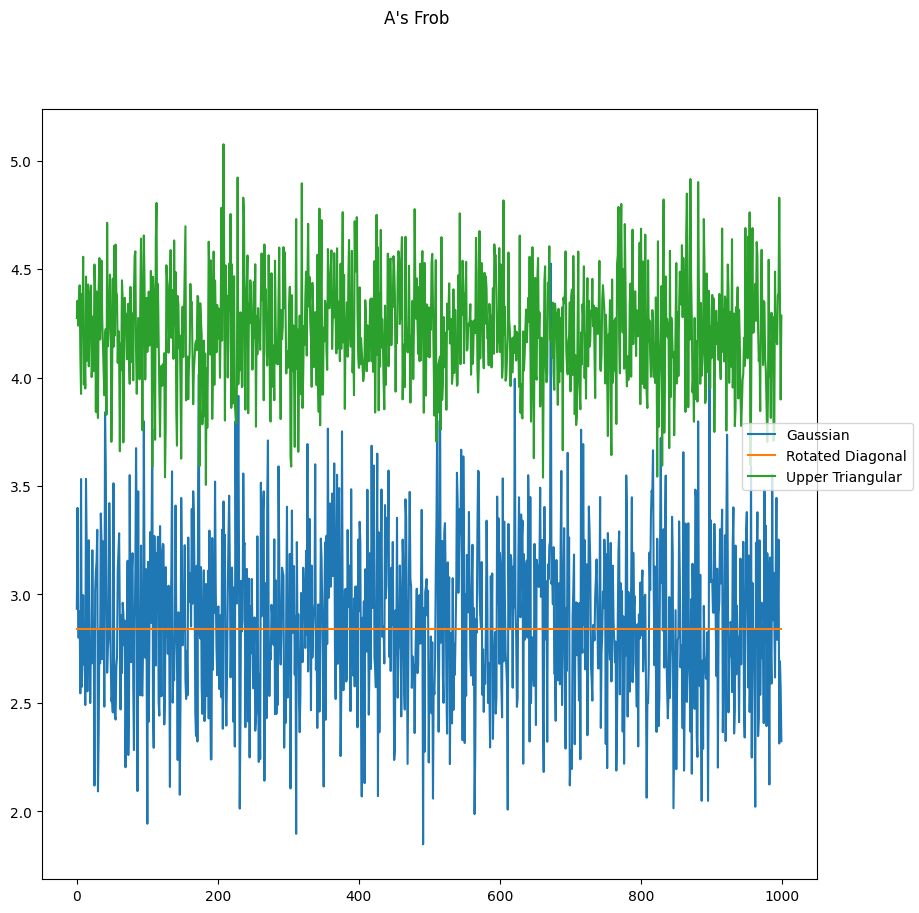

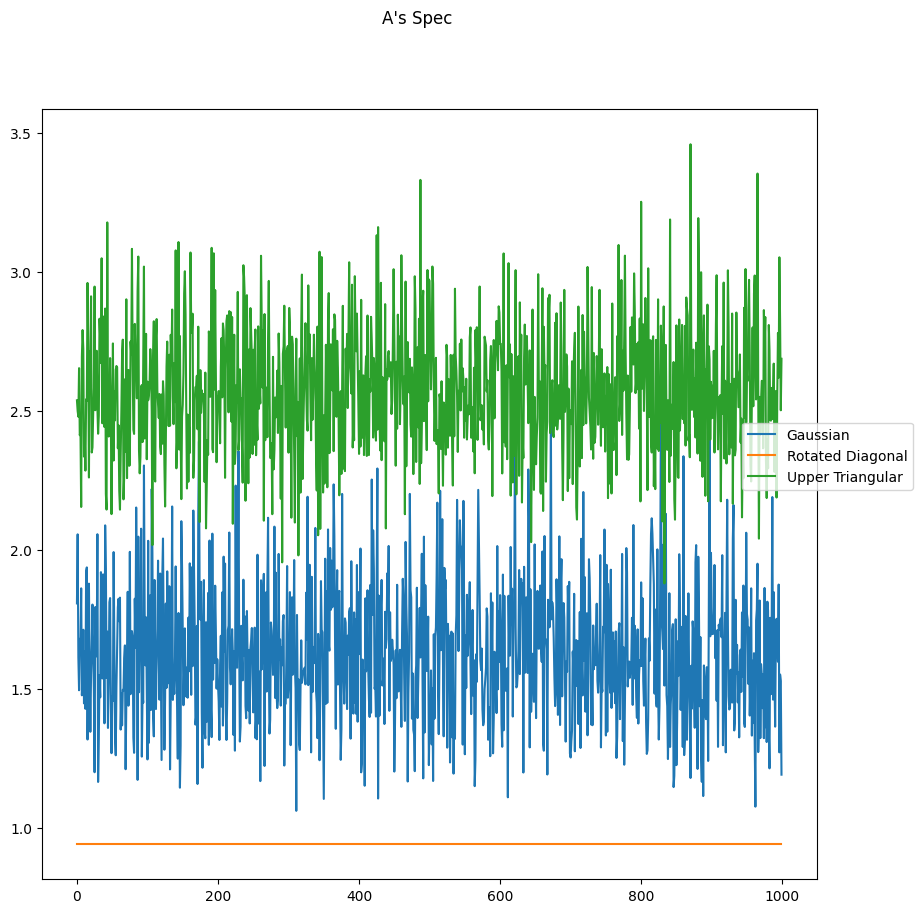

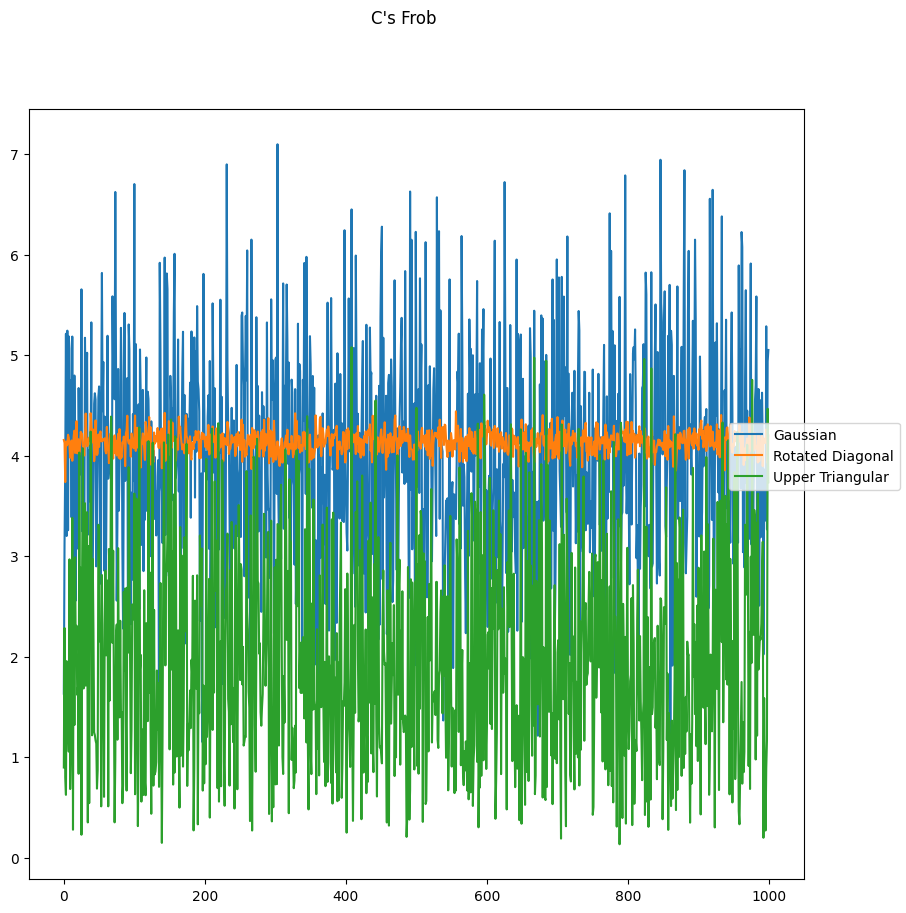

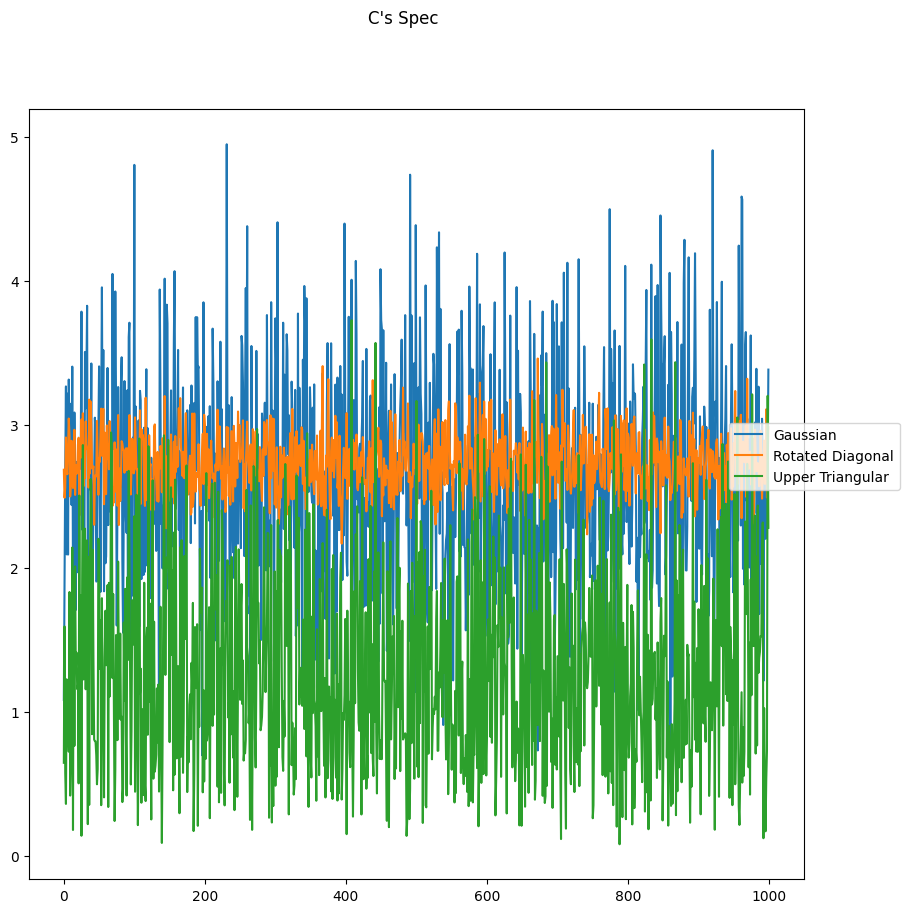

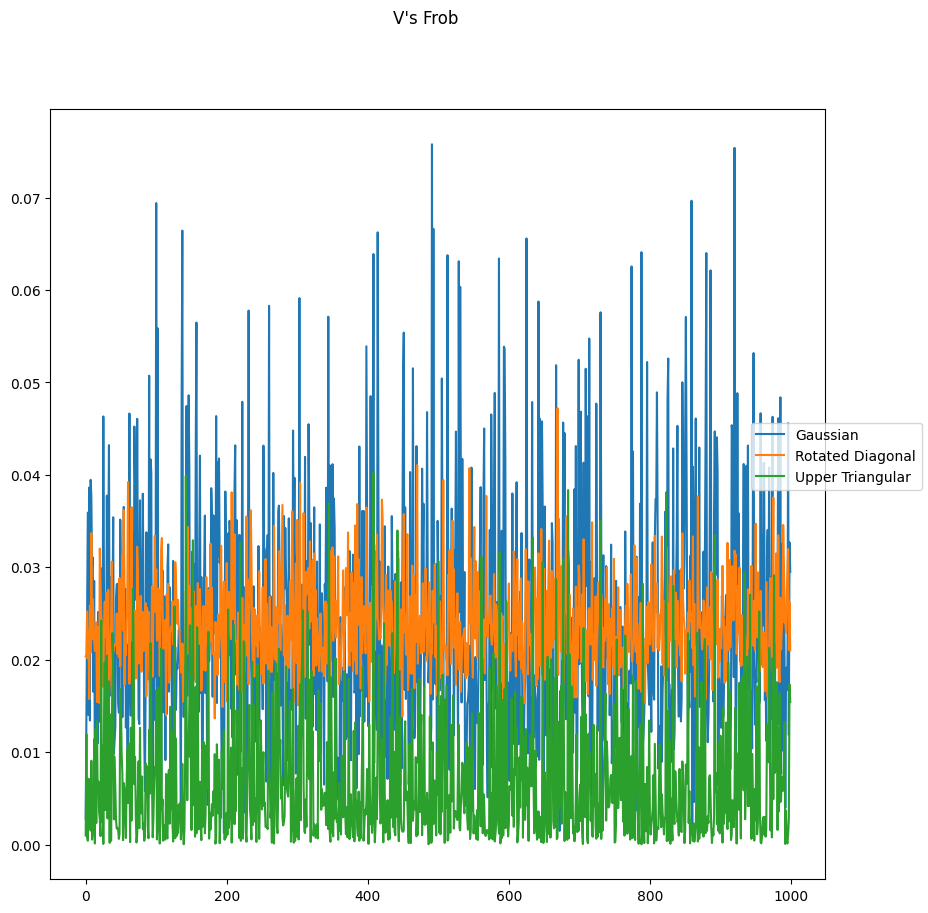

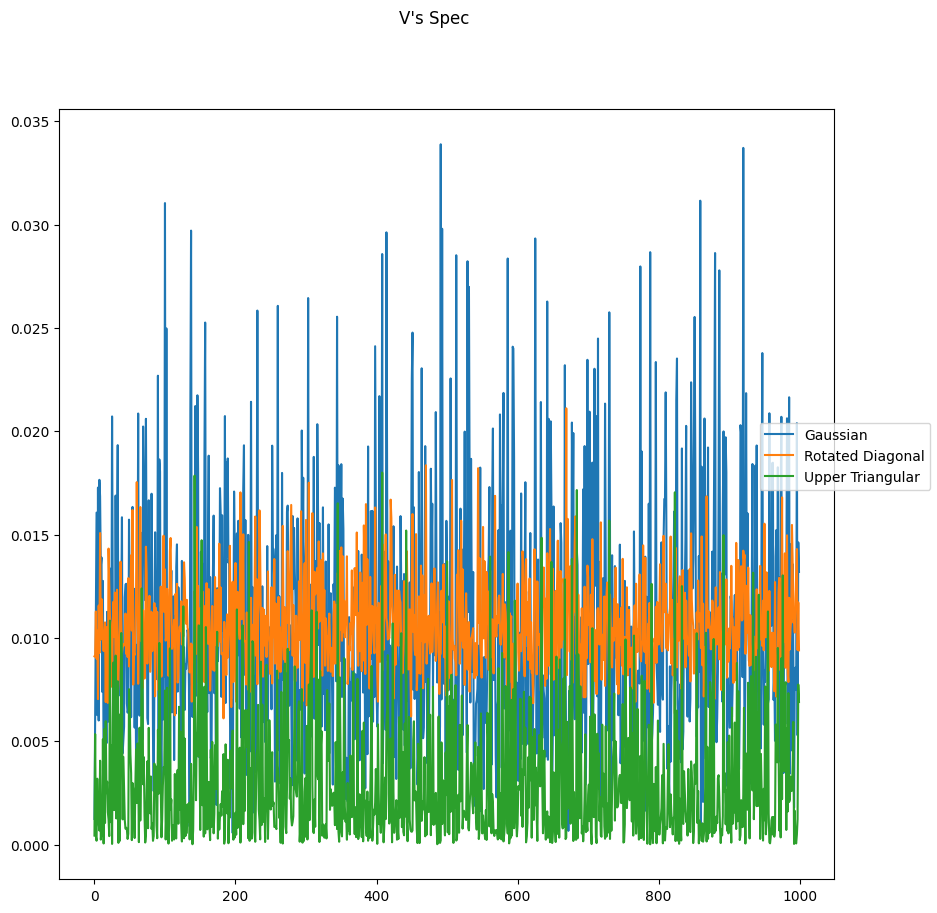

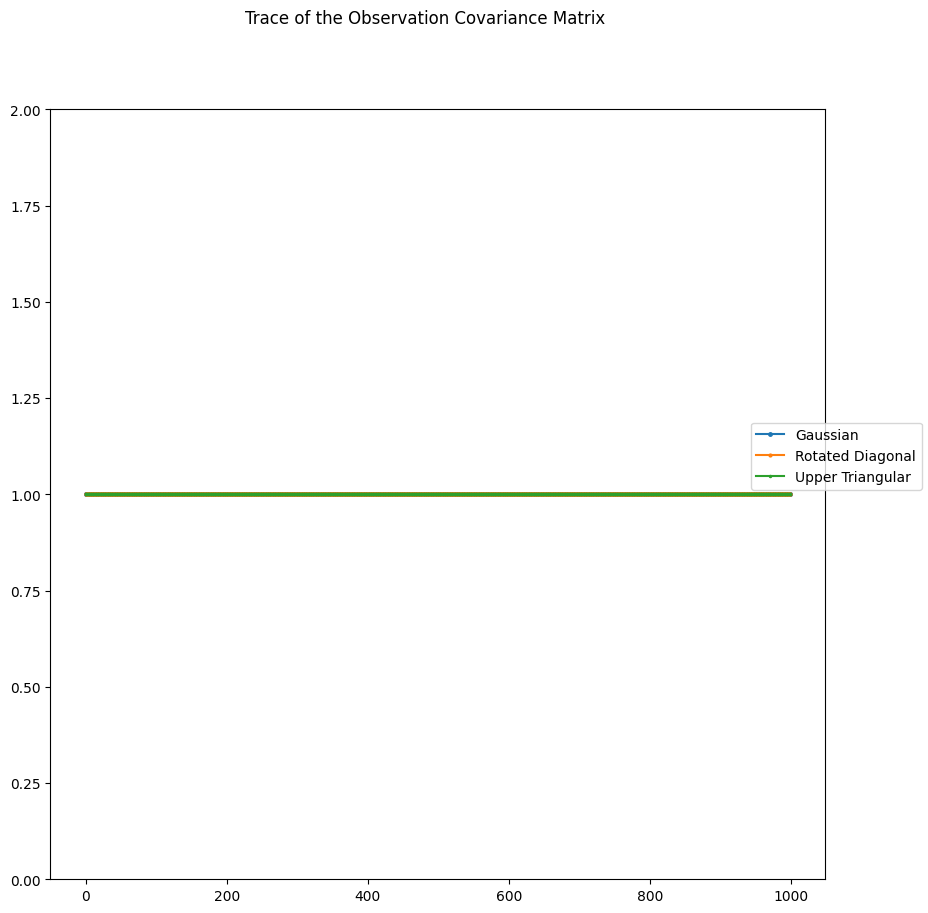

In [6]:
#give a list of colors that is as long as the len of err_lss.keys()
num_preds = 4 #number of predictors to plot
colors = plt.cm.tab10(np.linspace(0, 1, num_preds))

xlim = 50

#create a figure with subplots for each of the m indexes for the ccdfs
fig_ccdf, ax_ccdf = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_A_F, ax_A_F = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_A_2, ax_A_2 = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_C_F, ax_C_F = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_C_2, ax_C_2 = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_V_F, ax_V_F = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_V_2, ax_V_2 = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

#create a figure with subplots for each of the m indexes for the ccdfs
fig_Es, ax_Es = plt.subplots(1, 1, figsize=(10, 10), sharex=True)

handles_cdf = []
handles_ccdf = []
handles_A_F = []
handles_A_2 = []
handles_C_F = []
handles_C_2 = []
handles_V_F = []
handles_V_2 = []
handles_Es = []
labels = []

col = 0

placeholder = None
labels = ["Gaussian", "Rotated Diagonal", "Upper Triangular"]
err_lss = [gauss_val, rotdiag_val, upptri_val]
sims = [gauss_sim_objs, rotdiag_sim_objs, upptri_sim_objs]
i = 0
for errs in err_lss:

    obj = sims[i]
    A_fs = []
    A_2s = []
    C_fs = []
    C_2s = []
    V_fs = []
    V_2s = []
    Es = []
    for k in range(len(obj)):
        C = obj[k].C
        A = obj[k].A
        Pi  = obj[k].S_state_inf
        V  = np.eye(5) * obj[k].sigma_v**2

        A_fs.append(np.linalg.norm(obj[k].A, ord="fro"))
        A_2s.append(np.linalg.norm(obj[k].A, ord=2))
        C_fs.append(np.linalg.norm(obj[k].C, ord="fro"))
        C_2s.append(np.linalg.norm(obj[k].C, ord=2))
        V_fs.append(np.linalg.norm(np.eye(5)*obj[k].sigma_v**2))
        V_2s.append(obj[k].sigma_v**2)
        Es.append(np.linalg.trace(C @ Pi @ C.T + V))


    # if i < 3:
    #     print("shape of errs zero:", errs["Zero"].shape)
    #     zeros = np.mean(errs["Zero"], axis=(1,2))
    #     print("shape of zeros:", zeros.shape)

    #     print(labels[i] + " Average Y value: ", np.mean(zeros))
    #     print(labels[i] + " Median Y value: ", np.median(zeros))

    #     # #flatten the ratios along axis 0 but keep axis 2
    #     # ratios = ratios.reshape(-1, ratios.shape[2])

    #     #get the empirical cdf of the ratios
    #     ecdf = get_empirical_cdf(zeros)

    # else:
    #     print("new upp tri A")
    zeros = np.zeros((num_val_systems, 2000, context_len + 1))
    for j in range(len(gauss_val)):
        zeros[math.floor(j/2000), j % 2000, :] = np.linalg.norm(errs[j]["obs"], axis=1)**2

    print("shape of zeros:", zeros.shape)
    zeros = np.mean(zeros, axis=(1,2))
    print("shape of zeros:", zeros.shape)

    print(labels[i] + " Average Y value: ", np.mean(zeros))
    print(labels[i] + " Median Y value: ", np.median(zeros))

    # #flatten the ratios along axis 0 but keep axis 2
    # ratios = ratios.reshape(-1, ratios.shape[2])

    #get the empirical cdf of the ratios
    ecdf = get_empirical_cdf(zeros)


    #plot the ccdf
    line_ccdf, = ax_ccdf.step(ecdf.x, 1-ecdf.y, where='post', label=labels[i], color=colors[col], markersize=2)
    ax_ccdf.set_title(f'CCDF of y values')
    ax_ccdf.set_ylabel('CCDF')
    ax_ccdf.set_xlabel('y value')
    handles_ccdf.append(line_ccdf)
    # ax_ccdf.set_xlim([0, xlim])


    line_A_F, = ax_A_F.plot(range(len(obj)), A_fs, label=labels[i])
    line_A_2, = ax_A_2.plot(range(len(obj)), A_2s, label=labels[i])
    line_C_F, = ax_C_F.plot(range(len(obj)), C_fs, label=labels[i])
    line_C_2, = ax_C_2.plot(range(len(obj)), C_2s, label=labels[i])
    line_V_F, = ax_V_F.plot(range(len(obj)), V_fs, label=labels[i])
    line_V_2, = ax_V_2.plot(range(len(obj)), V_2s, label=labels[i])
    line_Es, = ax_Es.plot(range(len(obj)), Es, label=labels[i], marker=".", markersize=5-i)
    ax_Es.set_ylim([0, 2])

    i += 1
    handles_A_F.append(line_A_F)
    handles_A_2.append(line_A_2)
    handles_C_F.append(line_C_F)
    handles_C_2.append(line_C_2)
    handles_V_F.append(line_V_F)
    handles_V_2.append(line_V_2)
    handles_Es.append(line_Es)
    col += 1

fig_ccdf.legend(handles_ccdf, labels, loc='center right')
fig_A_F.legend(handles_A_F, labels, loc='center right')
fig_A_2.legend(handles_A_2, labels, loc='center right')
fig_C_F.legend(handles_C_F, labels, loc='center right')
fig_C_2.legend(handles_C_2, labels, loc='center right')
fig_V_F.legend(handles_V_F, labels, loc='center right')
fig_V_2.legend(handles_V_2, labels, loc='center right')
fig_Es.legend(handles_Es, labels, loc='center right')

fig_A_F.suptitle("A's Frob")
fig_A_2.suptitle("A's Spec")
fig_C_F.suptitle("C's Frob")
fig_C_2.suptitle("C's Spec")
fig_V_F.suptitle("V's Frob")
fig_V_2.suptitle("V's Spec")
fig_Es.suptitle("Trace of the Observation Covariance Matrix")

fig_ccdf.text(0.5, 0.01, f'Generated at {time.ctime()}', ha='center')

plt.show()

